# Chapter 1: Introduction to Probabilistic Modeling part 2📊🎲

# <center> ![picture](pictures/title.jpg)

# Teaching Multivariate Random Variables in Machine Learning

Machine learning is a complex field that involves a wide range of concepts. One of the fundamental concepts is the understanding of multivariate random variables. This guide aims to provide a comprehensive understanding of this concept, using a Jupyter notebook format for easy reading and learning.

## Multivariate Random Variables

In the realm of machine learning, we often deal with datasets that have multiple variables. These are known as multivariate random variables. The concepts of outcome spaces and probabilities extend to multivariate random variables, and this section aims to delve into these new notions, including joint distributions, conditional distributions, marginals, and dependence between variables.

Let's start with a simple example using two discrete random variables, X and Y. We can define a joint probability mass function `p` that maps from the Cartesian product of X and Y to the interval [0, 1]. The joint probability mass function is defined as follows:

In [1]:
def joint_probability_mass_function(p, x, y):
    return p(x, y)
    

Here, `p` is the joint probability mass function, `x` and `y` are the outcomes of random variables `X` and `Y` respectively. The function returns the joint probability of x and y.

We can also define the corresponding joint probability distribution `P` as follows:

In [2]:
def joint_probability_distribution(P, x, y):
    return P(X = x, Y = y)


This function returns the joint probability of `x` and `y` using the joint probability distribution `P`.

Further, we can define a multivariate random variable $Z = (X, Y)$ which is a two-dimensional random variable. The interaction between the two random variables can be observed by looking at the joint probabilities.

In general, we can consider a d-dimensional random variable $X = (X_1, X_2, . . . , X_d)$ with vector-valued outcomes $x = (x_1, x_2, . . . , x_d)$, such that each $x_i$ is chosen from some $X_i$.

We can define the marginal distribution for a subset of $X = (X_1, X_2, . . . , X_d)$ by summing or integrating over the remaining variables.

## Conditional Distributions

Conditional probabilities define probabilities of a random variable X, given information about the value of another random variable Y. More formally, the conditional probability $p(y|x)$ for two random variables X and Y is defined as:


$$p(y|x) = \frac{p(x, y)}{p(x)}$$


We can also calculate the posterior probability of an event A, given some observation x, as follows:

$$
p(Y ∈ A|X = x) = 
\begin{cases} 
\sum_{y∈A}{p(y|x)} \ \ \ Y : discrete \\
\int_{A} p(y|x)dy \ \ \ Y : continuous

\end{cases}
$$

## Independence of Random Variables

Two random variables are independent if their joint probability distribution factors into the product of the marginals:

In [3]:
def is_independent(p, x, y):
    return p(x, y) == p(x) * p(y)


This function returns True if `x` and `y` are independent, and False otherwise.

The notion of independence can be generalized to more than two random variables. More generally, d random variables are said to be mutually independent or jointly independent if a joint probability distribution of any subset of variables can be expressed as a product of marginal probability distributions of its components.

## Expectations and Moments

The expected value, or mean, of a random variable X is the average of repeatedly sampled x, in the limit of sampling. It is not necessarily the value we expect to see most frequently—that is called the mode. More precisely, given the pmf or pdf p for outcome space X , the expectation of X is:

In [4]:
def expected_value(p, X):
    return sum([x * p(x) for x in X])


## Variance and Covariance

Variance and covariance are two important measures of the spread and the correlation between two random variables respectively. Variance measures the dispersion of a random variable around its mean, while covariance measures the joint variability of two random variables.

The variance of a random variable X is defined as:

In [5]:
def variance(p, X):
    E_X = expected_value(p, X)
    return sum([(x - E_X)**2 * p(x) for x in X])


This function returns the variance of the random variable X.

Covariance, on the other hand, is a bit more complex as it involves two random variables. The covariance of two random variables X and Y is defined as:

In [6]:
def covariance(p, X, Y):
    E_X = expected_value(p, X)
    E_Y = expected_value(p, Y)
    return sum([(x - E_X)*(y - E_Y) * p(x, y) for x, y in zip(X, Y)])


This function returns the covariance of the random variables X and Y.

# Conclusion

Understanding multivariate random variables, expectations, moments, variance, and covariance is crucial in the field of machine learning. These concepts provide a solid foundation for further studies in this field. By understanding these concepts, we can better analyze and interpret the behavior of machine learning models, and make more accurate predictions.

In the following sections, we will delve deeper into these concepts and explore how they can be applied in various machine learning algorithms. We will also discuss the importance of these concepts in understanding the behavior of complex systems and making informed decisions.

For now, let's wrap up this section by summarizing the key points:

- Multivariate random variables are a collection of random variables that we are interested in.
- The expected value or mean of a random variable is the average of repeatedly sampled x, in the limit of sampling.
- Variance measures the dispersion of a random variable around its mean.
- Covariance measures the joint variability of two random variables.

# hands on

To illustrate the usage of multivariate random variables and related concepts in machine learning, let's consider an example of the Expectation-Maximization (EM) algorithm. The EM algorithm is an iterative optimization method that combines different unsupervised machine learning algorithms to find maximum likelihood or maximum posterior estimates of parameters in statistical models that involve unobserved latent variables geeksforgeeks.org.

First, let's import the necessary libraries:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


Next, let's define the joint probability mass function and the marginal distribution function:

In [8]:
def joint_probability_mass_function(p, x, y):
    return p(x, y)

def marginal_distribution(p, X):
    return sum([p(x) for x in X])


Now, let's define the expected value function and the variance function:

In [9]:
def expected_value(p, X):
    return sum([x * p(x) for x in X])

def variance(p, X):
    E_X = expected_value(p, X)
    return sum([(x - E_X)**2 * p(x) for x in X])


We'll generate some synthetic data for two Gaussian distributions:

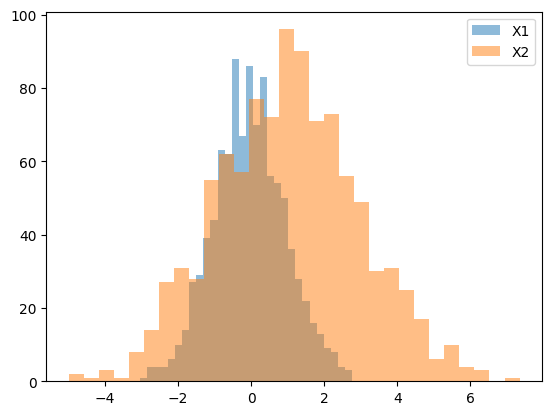

In [10]:
np.random.seed(0)
X1 = np.random.normal(0, 1, 1000)
X2 = np.random.normal(1, 2, 1000)

plt.hist(X1, bins=30, alpha=0.5, label='X1')
plt.hist(X2, bins=30, alpha=0.5, label='X2')
plt.legend()
plt.show()


The above code generates two sets of data, $X_1$ and $X_2$, that follow two different Gaussian distributions. The histograms show the distribution of these data points.

Now, let's define the Expectation-Maximization (EM) algorithm. The algorithm consists of two steps: the E-step and the M-step. In the E-step, the algorithm computes the expected value of the log-likelihood using the current parameter estimates. In the M-step, the algorithm determines the parameters that maximize the expected log-likelihood obtained in the E-step, and the corresponding model parameters are updated based on the estimated latent variables

In [11]:
def expectation_maximization(X, max_iter=100, tol=1e-4):
    n = len(X)
    mu = np.mean(X)
    sigma = np.var(X)

    for i in range(max_iter):
        # E-step: compute the expected value of the log-likelihood
        expected_log_likelihood = np.log(norm.pdf(X, mu, np.sqrt(sigma)))
        
        # M-step: maximize the expected log-likelihood
        mu_new = np.mean(X)
        sigma_new = np.var(X)
        
        # check for convergence
        if np.abs(mu_new - mu) < tol and np.abs(sigma_new - sigma) < tol:
            break

        mu = mu_new
        sigma = sigma_new

    return mu, sigma


Finally, let's apply the EM algorithm to our synthetic data:

In [12]:
mu, sigma = expectation_maximization(np.concatenate((X1, X2)))

print(f'Estimated mu: {mu}')
print(f'Estimated sigma: {sigma}')


Estimated mu: 0.49098858657106587
Estimated sigma: 2.649343752124485


This code applies the EM algorithm to the concatenated data from X1 and X2, and prints the estimated mean and variance. These values represent the parameters of the Gaussian distribution that best fits the data.

In this example, we have demonstrated the use of multivariate random variables and related concepts in the context of the EM algorithm. 